## Time Series - Furniture Sales Forecast

- Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc. To do this analysis, the owner first has to segregate the data by category and analyze each entity separately. 


- For each entity, a forecast can be estimated based on the past sales of that entity. 
The idea behind this is to find out the popularity of a certain product and how its sales can impact the business.


- Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.


In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 


import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller,acf,pacf


from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
df_og = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',index_col='Order Date',parse_dates = True)
df_og.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df_og.tail()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
2017-02-26,9993,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
2017-05-04,9994,CA-2017-119914,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
df_og.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### OBSERVATIONS:-  NO MISSING VALUES FOUND

## UNIVARIATE ANALYSIS ON ORIGINAL DATA

In [5]:
df_og.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Ship Mode

In [6]:
df_og['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
df_og['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:ylabel='Ship Mode'>

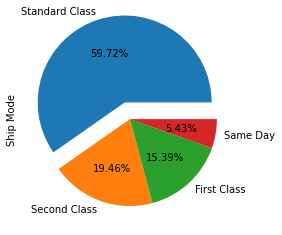

In [8]:
df_og['Ship Mode'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0.2,0,0,0])

### Observation:- Shipping mode of 'Standard Class' is the most common type of shipping mode

### Analysis on Segment

In [9]:
df_og['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

<AxesSubplot:xlabel='Segment', ylabel='count'>

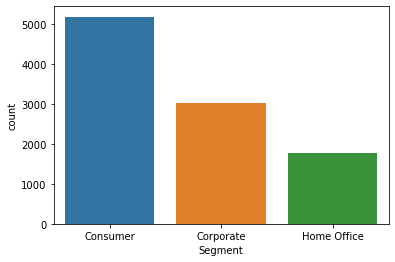

In [10]:
sns.countplot(df_og['Segment'])

### Observation:- Consumer segment is the highest contributer

df_og['Segment'].value_counts().plot(kind='bar')

In [11]:
cate = ['Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category','Product Name']

In [12]:
def cat(val):
    df_og[val].value_counts().plot(kind='pie',autopct='%0.2f%%')

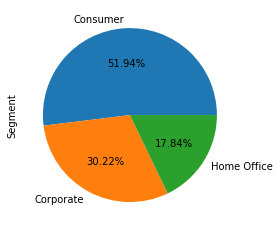

In [13]:
cat('Segment')

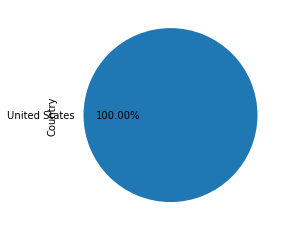

In [14]:
cat('Country')

<AxesSubplot:>

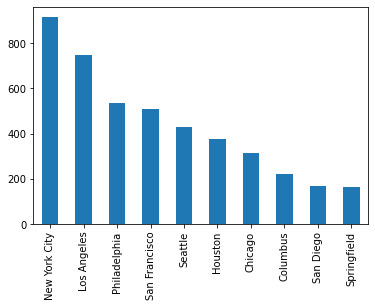

In [15]:
df_og['City'].value_counts().head(10).plot(kind='bar')

### Observation:- New york city orders maximum furniture and related items

<AxesSubplot:ylabel='City'>

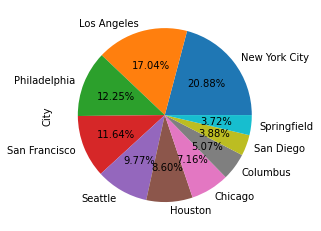

In [16]:
df_og['City'].value_counts().head(10).plot(kind='pie',autopct='%0.2f%%')

In [17]:
cate

['Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Product Name']

<AxesSubplot:>

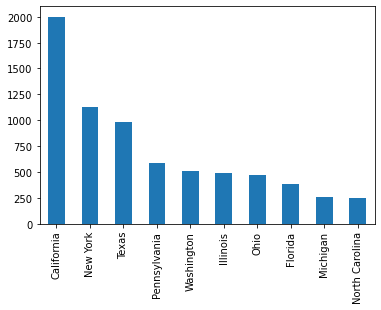

In [18]:
df_og['State'].value_counts().head(10).plot(kind='bar')

### Maximum orders are from California

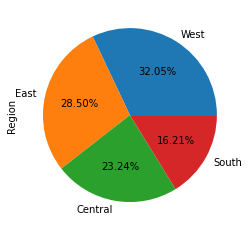

In [19]:
cat('Region')

### Western Region has the highest orders

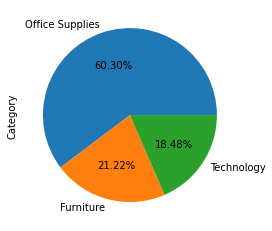

In [20]:
cat('Category')

#### Office supplies related furniture has the maximum orders

<AxesSubplot:>

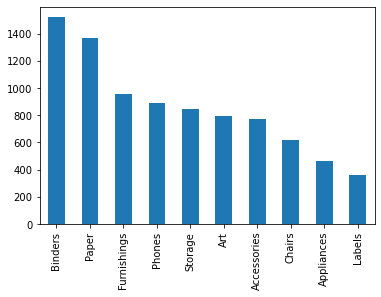

In [21]:
df_og['Sub-Category'].value_counts().head(10).plot(kind='bar')

### Blinders sub-category has the highest demand in terms of sub-category

<AxesSubplot:>

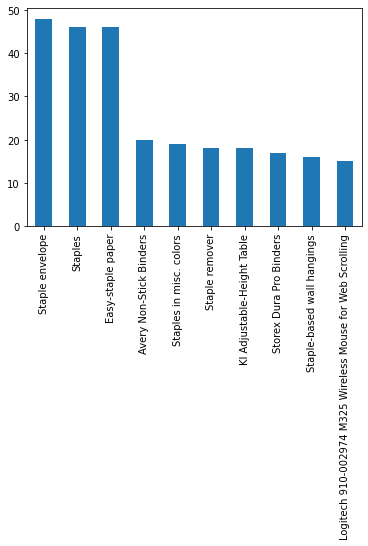

In [22]:
df_og['Product Name'].value_counts().head(10).plot(kind='bar')

### Staple Envelope has the highest demand product name wise

## Univariate Analysis on Numerical/Continous columns

In [23]:
num = ['Sales', 'Quantity', 'Discount', 'Profit']


In [24]:
def num(val):
    fig,ax = plt.subplots(1,2,figsize=(14,7))
    sns.boxplot(df_og[val],ax=ax[0])
    sns.distplot(df_og[val],ax=ax[1])
    

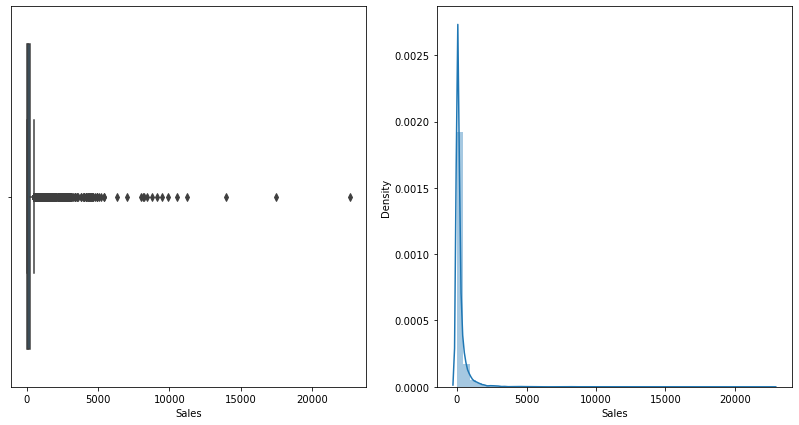

In [25]:
num('Sales')

In [26]:
df_og['Sales'].skew()

12.972752341816228

### Data for Sales is right skewed

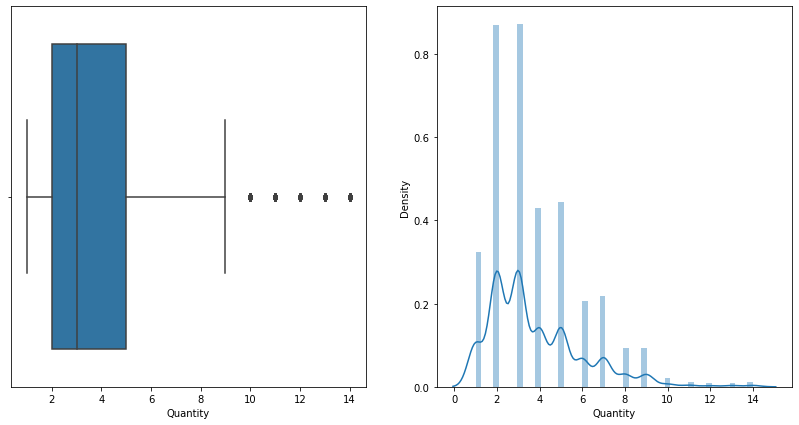

In [27]:
num('Quantity')

In [28]:
df_og['Quantity'].skew()

1.2785447527223421

### 50% OF QUANTITIES ORDERED ARE IN THE RANGE 2-5

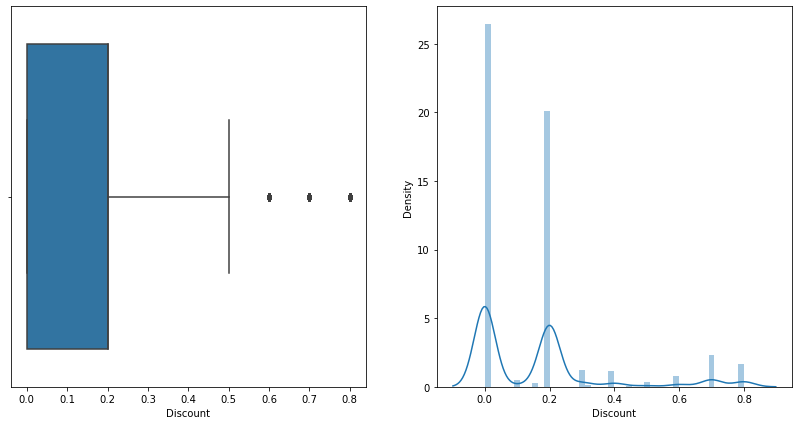

In [29]:
num('Discount')

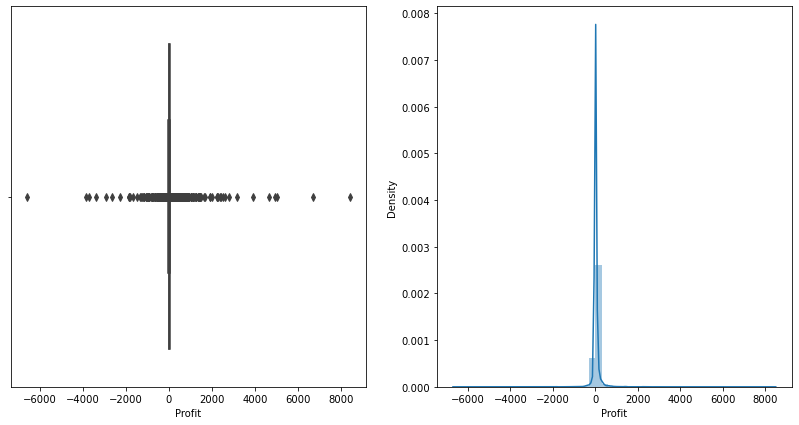

In [30]:
num('Profit')

In [31]:
df_og.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [32]:
df_og.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Pro

In [34]:
df_og.head(3)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [35]:
df_og.sort_index(inplace=True)

In [36]:
df_og

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,909,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
2017-12-30,908,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [37]:
df_furniture = df_og[df_og["Category"]=="Furniture"].loc[:,["Category","Sales"]]
df_furniture

,Category,Sales
Order Date,,
2014-01-06,Furniture,2573.820
2014-01-07,Furniture,76.728
2014-01-10,Furniture,51.940
2014-01-11,Furniture,9.940
2014-01-13,Furniture,545.940
...,...,...
2017-12-29,Furniture,300.980
2017-12-29,Furniture,68.460
2017-12-29,Furniture,393.568


In [38]:
df_furniture = df_furniture[['Sales']]
df_furniture

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,300.980
2017-12-29,68.460
2017-12-29,393.568


In [39]:
df_office = df_og[df_og["Category"]=="Office Supplies"].loc[:,["Category","Sales"]]
df_office

,Category,Sales
Order Date,,
2014-01-03,Office Supplies,16.448
2014-01-04,Office Supplies,11.784
2014-01-04,Office Supplies,272.736
2014-01-04,Office Supplies,3.540
2014-01-05,Office Supplies,19.536
...,...,...
2017-12-30,Office Supplies,20.720
2017-12-30,Office Supplies,209.300
2017-12-30,Office Supplies,3.024


In [40]:
df_office = df_office[['Sales']]
df_office

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,20.720
2017-12-30,209.300
2017-12-30,3.024


In [41]:
df_tech = df_og[df_og["Category"]=="Technology"].loc[:,["Category","Sales"]]
df_tech

,Category,Sales
Order Date,,
2014-01-06,Technology,391.980
2014-01-06,Technology,755.960
2014-01-09,Technology,31.200
2014-01-13,Technology,646.740
2014-01-15,Technology,149.950
...,...,...
2017-12-25,Technology,120.000
2017-12-27,Technology,164.388
2017-12-28,Technology,14.850


In [42]:
df_tech = df_tech[['Sales']]
df_tech

,Sales
Order Date,
2014-01-06,391.980
2014-01-06,755.960
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
...,...
2017-12-25,120.000
2017-12-27,164.388
2017-12-28,14.850


In [43]:
df_furniture_month = df_furniture.resample('M').sum()

In [44]:
df_office_month = df_office.resample('M').sum()

In [45]:
df_tech_month = df_tech.resample('M').sum()

In [46]:
df_furniture_month.shape,df_office_month.shape,df_office_month.shape

((48, 1), (48, 1), (48, 1))

In [47]:
def decompose(df):
    seasonal_decompose(df,period=12).plot();

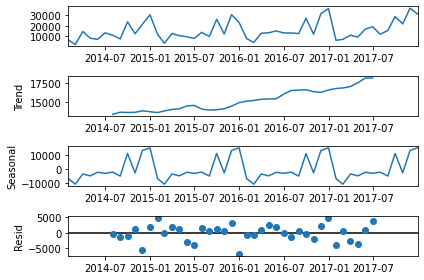

In [48]:
decompose(df_furniture_month)

- UPWARD TREND IN FURNITURE SALES OVER THE YEAR OBSERVED

- SEASONALITY OBSERVED TOO

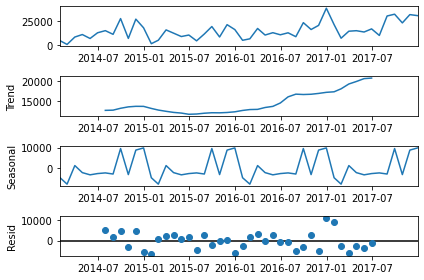

In [49]:
decompose(df_office_month)

- UPWARD TREND IN OFFICE SUPPLIES SALES OVER THE YEAR OBSERVED.

- SEASONALITY OBSERVED TOO

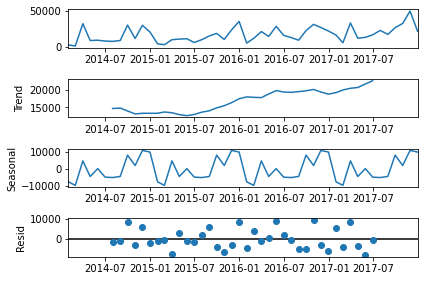

In [50]:
decompose(df_tech_month)

- UPWARD TREND IN TECHNOLOGY SALES OVER THE YEAR OBSERVED

- SEASONALITY OBSERVED TOO

### Working on Furniture Sales from hereon

#### Since we have both trend and seasonality in our furniture sales data we can go for triple exponential smoothening

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing

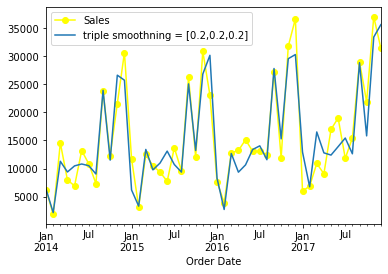

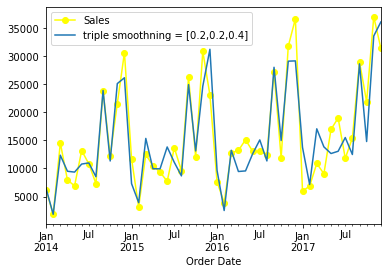

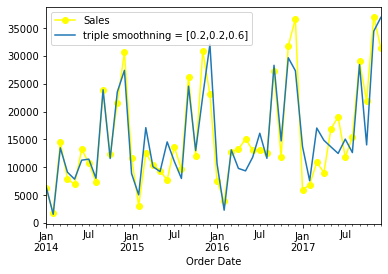

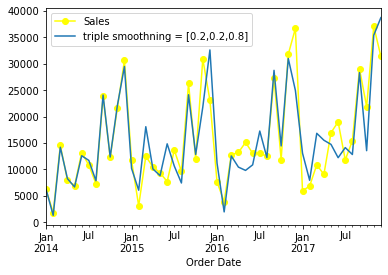

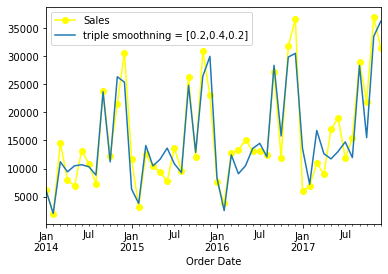

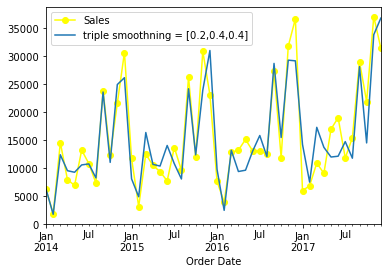

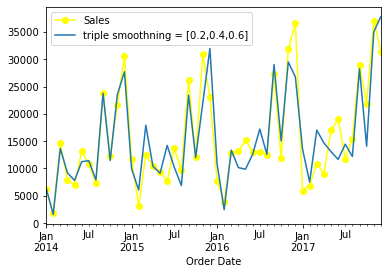

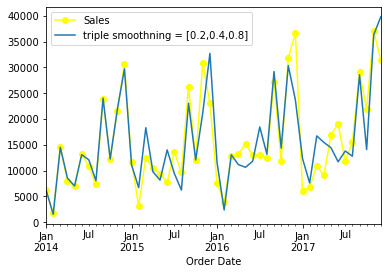

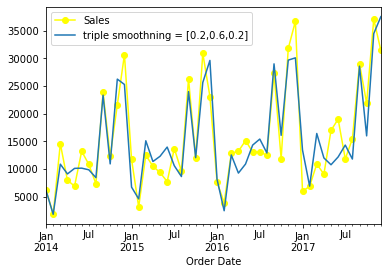

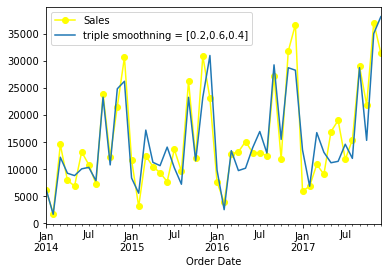

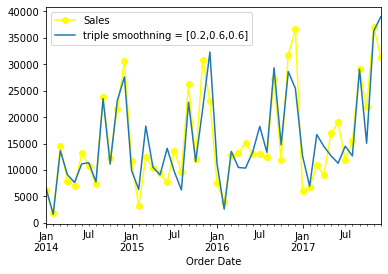

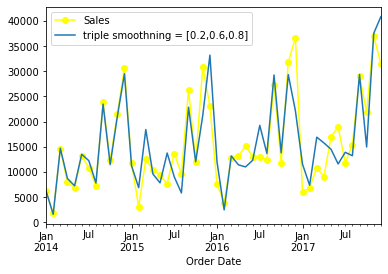

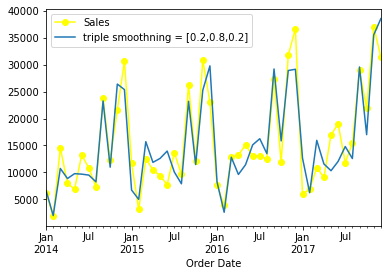

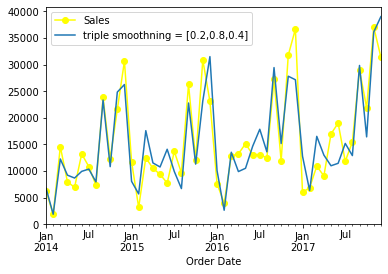

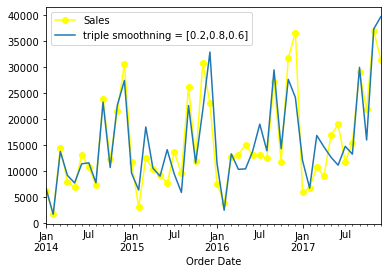

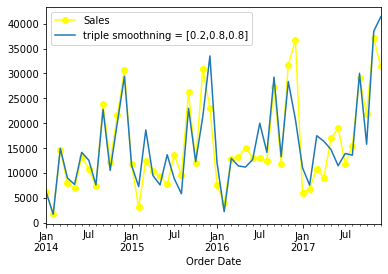

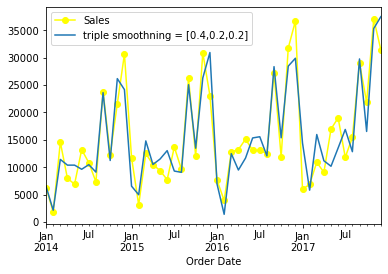

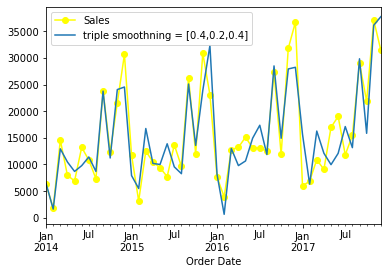

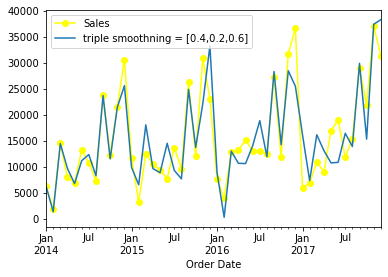

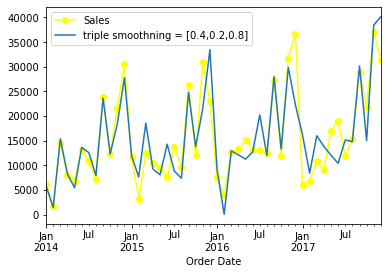

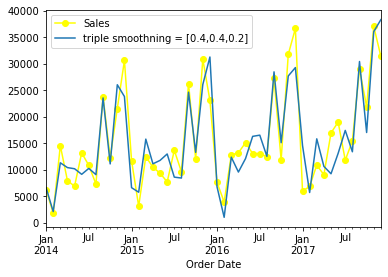

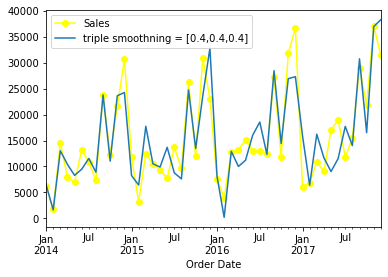

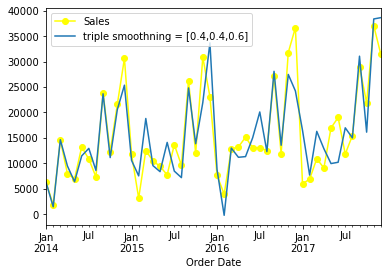

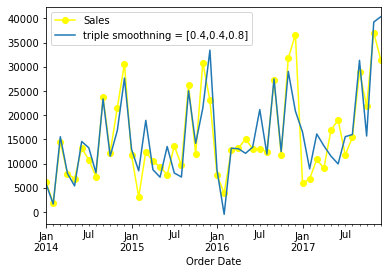

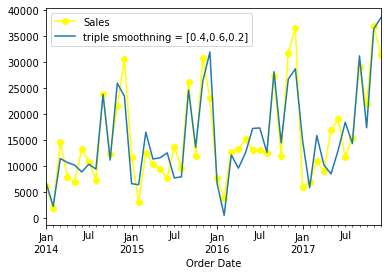

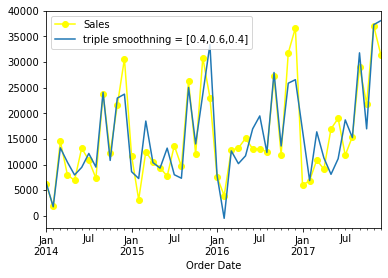

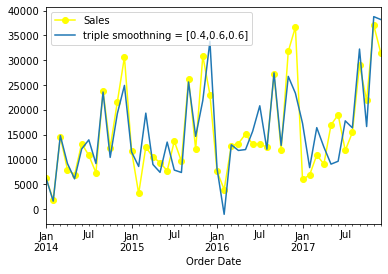

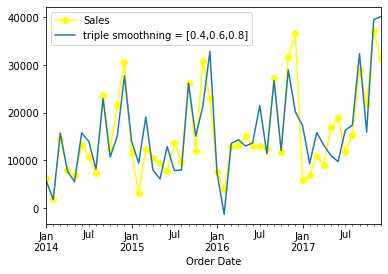

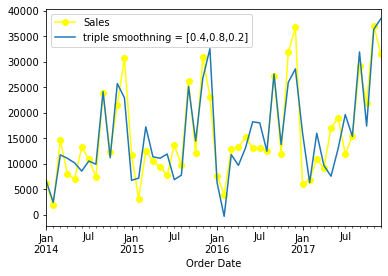

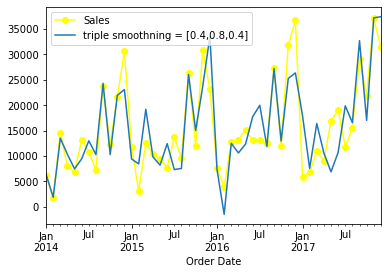

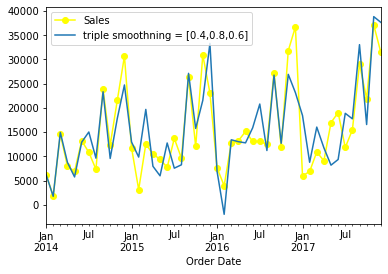

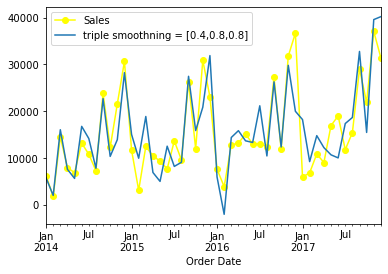

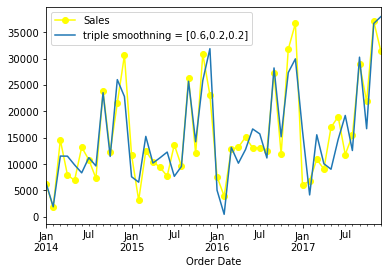

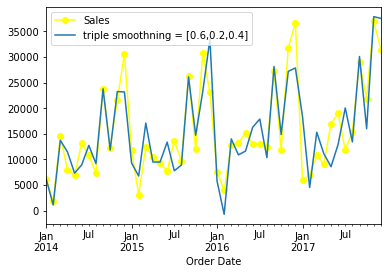

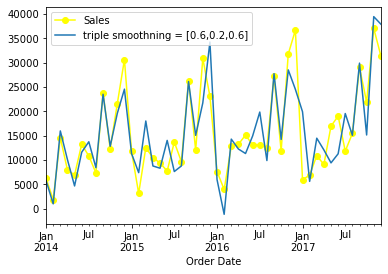

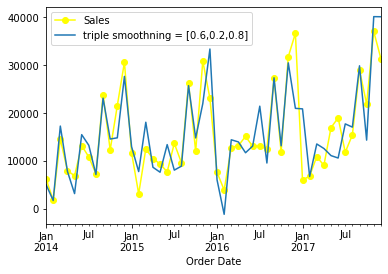

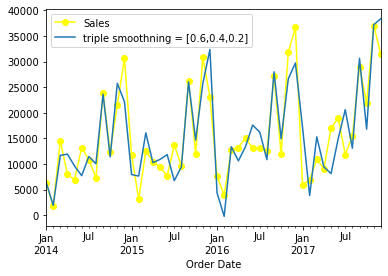

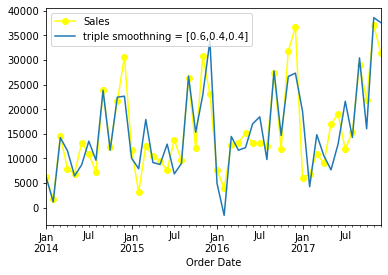

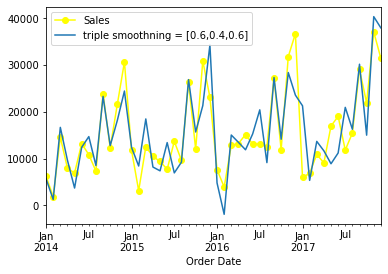

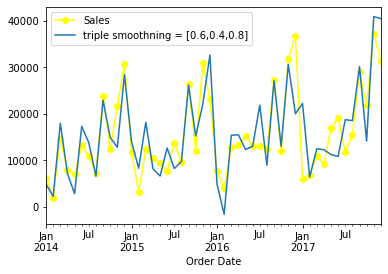

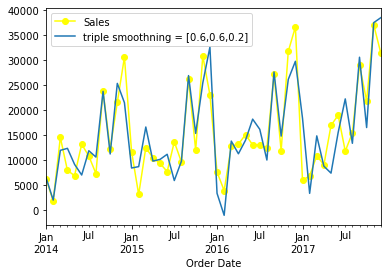

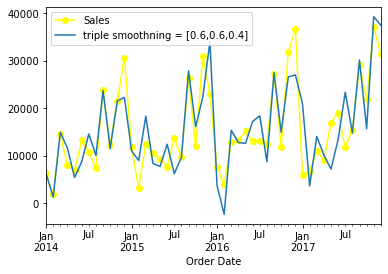

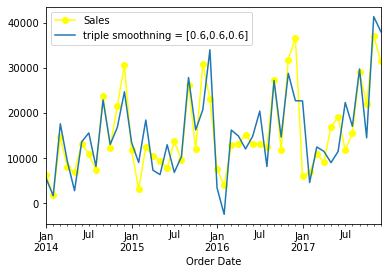

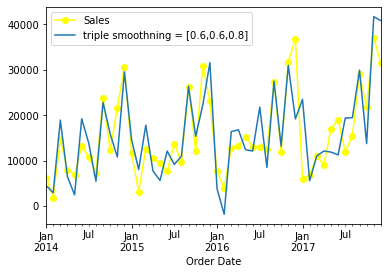

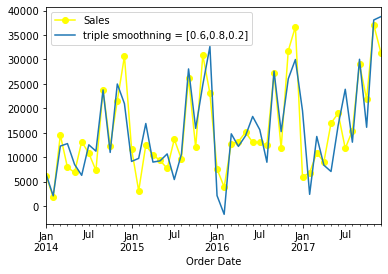

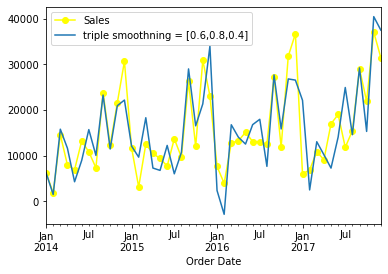

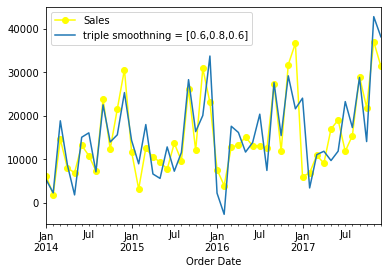

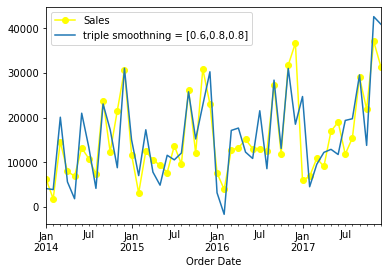

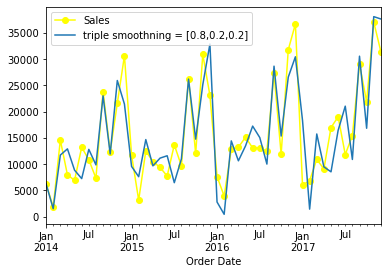

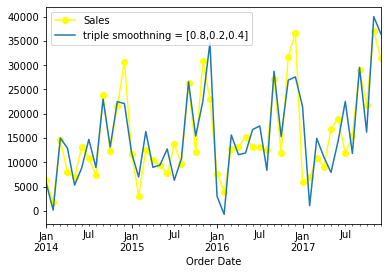

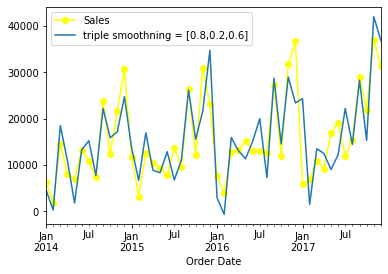

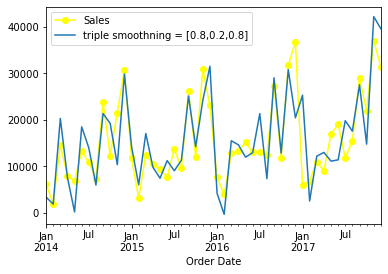

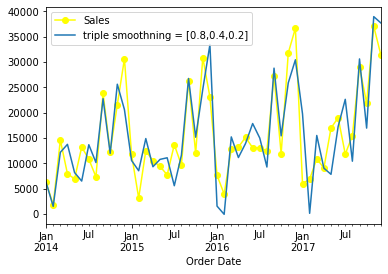

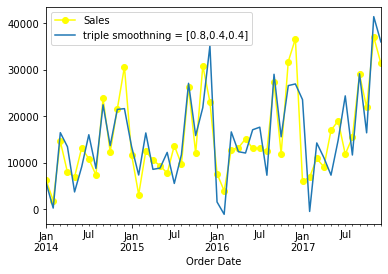

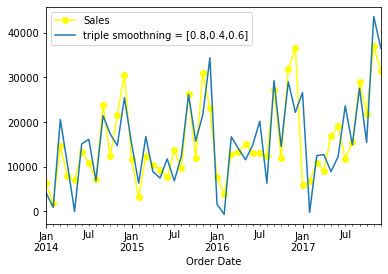

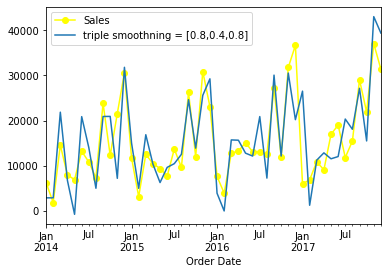

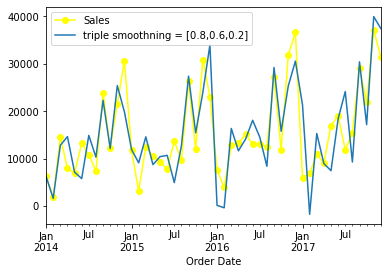

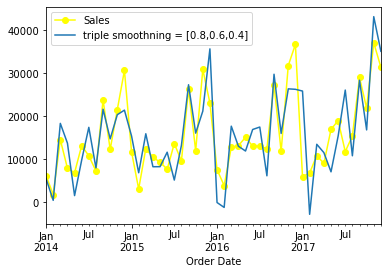

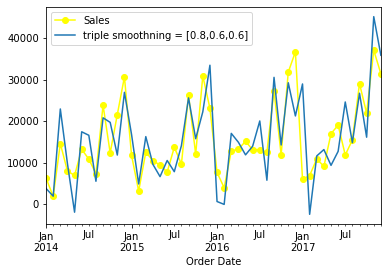

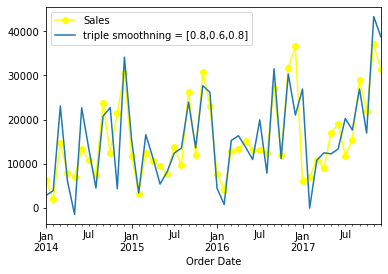

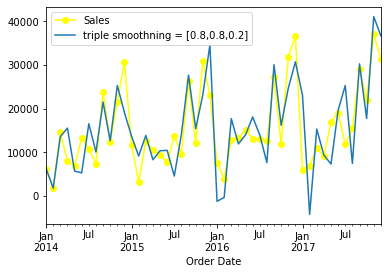

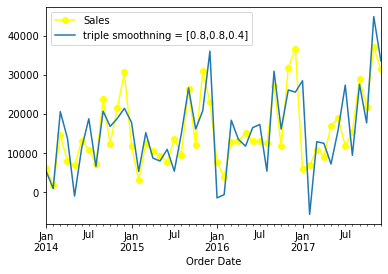

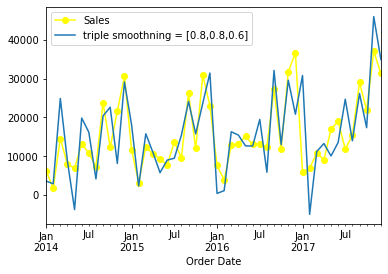

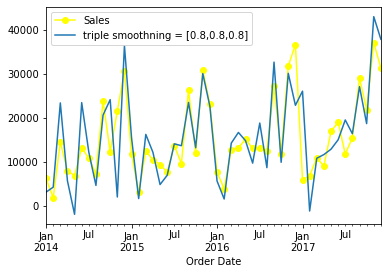

In [52]:
for alpha in [0.2,0.4,0.6,0.8]:
    for beta in [0.2,0.4,0.6,0.8]:
        for gamma in [0.2,0.4,0.6,0.8]:
            model0 = ExponentialSmoothing(df_furniture_month,trend='add',seasonal='add').fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
            dt = model0.fittedvalues
            df_furniture_month.plot(marker='o',color='yellow',label='Actual Furniture Sales')
            dt.plot(label=f"triple smoothning = [{alpha},{beta},{gamma}]");
            plt.legend()
            plt.show()

In [53]:
final_trip_exp = ExponentialSmoothing(df_furniture_month,trend='add',seasonal='add').fit(smoothing_level=0.6,smoothing_trend=0.4,smoothing_seasonal=0.6)
print(final_trip_exp)
model_preds = final_trip_exp.fittedvalues

Text(0.5, 1.0, 'Triple Exponent Smoothing')

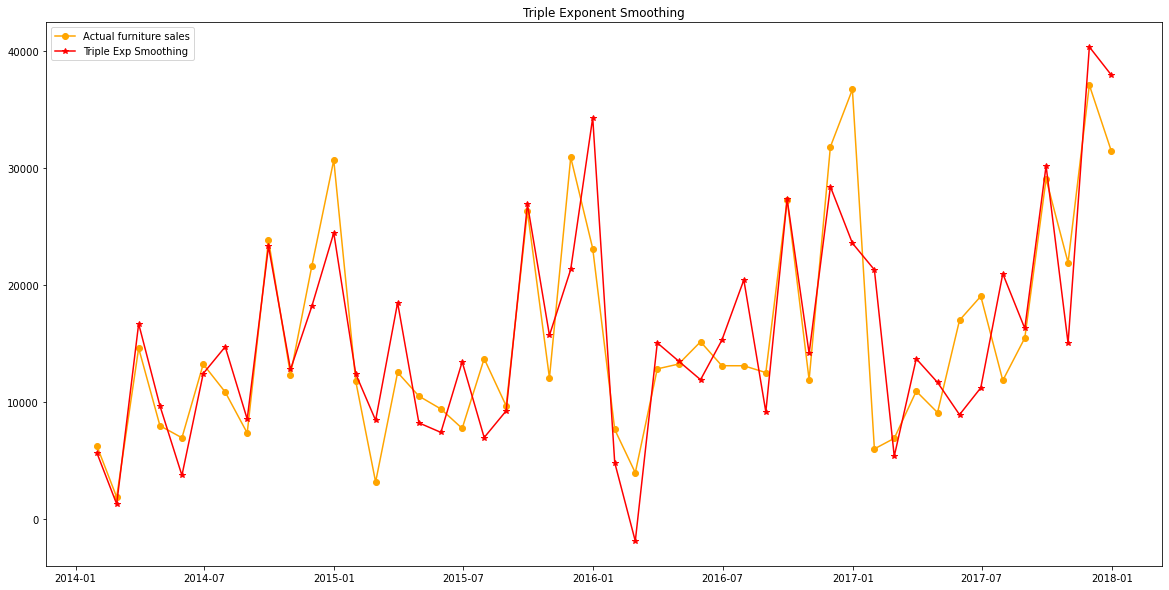

In [54]:
plt.figure(figsize = (20,10))
plt.plot(df_furniture_month, marker='o',color='orange',label='Actual furniture sales')
plt.plot(model_preds,marker='*',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')

In [55]:
model_preds

Order Date
2014-01-31     5644.951503
2014-02-28     1252.575506
2014-03-31    16659.004223
2014-04-30     9638.914019
2014-05-31     3699.354372
2014-06-30    12401.485824
2014-07-31    14688.863397
2014-08-31     8506.802633
2014-09-30    23278.856725
2014-10-31    12754.184657
2014-11-30    18134.088990
2014-12-31    24424.435038
2015-01-31    12364.164573
2015-02-28     8405.425631
2015-03-31    18460.752791
2015-04-30     8186.528541
2015-05-31     7374.238316
2015-06-30    13405.224331
2015-07-31     6934.517650
2015-08-31     9214.549147
2015-09-30    26862.520334
2015-10-31    15673.698702
2015-11-30    21301.100638
2015-12-31    34268.359095
2016-01-31     4794.310895
2016-02-29    -1916.177236
2016-03-31    15024.689076
2016-04-30    13471.763884
2016-05-31    11874.161745
2016-06-30    15252.929607
2016-07-31    20403.948937
2016-08-31     9129.130502
2016-09-30    27310.091821
2016-10-31    14125.323172
2016-11-30    28373.273588
2016-12-31    23548.759428
2017-01-31    212

In [56]:
df_furniture_month.tail()

,Sales
Order Date,
2017-08-31,15441.8740
2017-09-30,29028.2060
2017-10-31,21884.0682
2017-11-30,37056.7150
2017-12-31,31407.4668


In [58]:
final_trip_exp.forecast(10)

2018-01-31     2669.483022
2018-02-28     5573.058648
2018-03-31     9587.878900
2018-04-30     9196.516956
2018-05-31    14844.016928
2018-06-30    10683.977950
2018-07-31     2227.493359
2018-08-31     6851.072612
2018-09-30    20090.084716
2018-10-31     9724.795969
Freq: M, dtype: float64

In [59]:
def checkstn(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue<0.05:
        print("Data is Stationary proceed to model building")
    else:
        print("Data is not Stationary")

In [60]:
checkstn(model_preds)

3.935281715041264e-05
Data is Stationary proceed to model building


In [61]:
checkstn(df_furniture_month)

8.450793985809654e-05
Data is Stationary proceed to model building


## - Here it can be observed that

    - BOTH exponentially smoothened and Original furniture sales data is stationary.
    
    - So we can go forward with ARMA model for future furniture sales forcasting.


checkstn(df_office_month)

checkstn(df_tech_month)

## Furniture sales forecasting using ARMA model

#### ACF PACF PLOT to determine p and q values (here d = 0 for ARMA model)

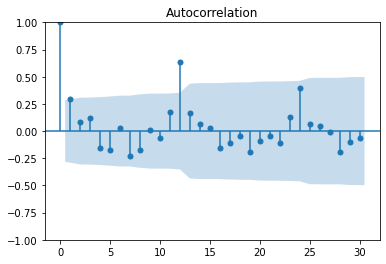

In [62]:
plot_acf(df_furniture_month,lags = 30);

## q = 1 since only one lolipop is outside of the error band properly

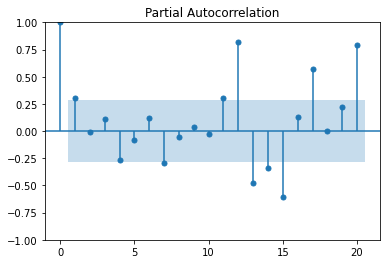

In [63]:
plot_pacf(df_furniture_month,lags = 20);

## p = 7 [1,2,3,4,5,6,7]  since 7 lolipop is outside of the error band properly 

## Checking different values of P and Q and AIC scores to determine the best values

In [64]:
ss = int(len(df_furniture_month)*0.8)
train = df_furniture_month.iloc[:ss]
test = df_furniture_month.iloc[ss:]

In [65]:
rez = []
for p in range(1,10):
    for q in range(1,3):
        arma_trial = ARIMA(train,order=(p,0,q))
        vals = arma_trial.fit()
        
        print('AIC value for different trial models',(p,0,q),'= ',vals.aic)
        rez.append(vals.aic)
        
print('Best values for our ARMA model is:- ',np.min(rez))

AIC value for different trial models (1, 0, 1) =  802.5188679959931
AIC value for different trial models (1, 0, 2) =  803.7816056519887
AIC value for different trial models (2, 0, 1) =  804.5110265113518
AIC value for different trial models (2, 0, 2) =  805.7445365689242
AIC value for different trial models (3, 0, 1) =  806.1209153217044
AIC value for different trial models (3, 0, 2) =  807.5940298772609
AIC value for different trial models (4, 0, 1) =  804.1641975773741
AIC value for different trial models (4, 0, 2) =  802.9525174144961
AIC value for different trial models (5, 0, 1) =  804.5687881950989
AIC value for different trial models (5, 0, 2) =  805.8588973252361
AIC value for different trial models (6, 0, 1) =  806.5888111710917
AIC value for different trial models (6, 0, 2) =  807.6285868730612
AIC value for different trial models (7, 0, 1) =  806.7114444129982
AIC value for different trial models (7, 0, 2) =  804.7413649357889
AIC value for different trial models (8, 0, 1) =

## - AIC score of AR(1,0,1) is best i.e 802.5188679959931



In [64]:
rez = []
for p in range(1,10):
    for q in range(1,10):
        arma_trial = ARIMA(df_furniture_month,order=(p,0,q))
        vals = arma_trial.fit()
        print('AIC value for different trial models',(p,0,q),'= ',vals.aic)
        rez.append(vals.aic)
print('Best values for our ARMA model is:- ',np.min(rez))

AIC value for different trial models (1, 0, 1) =  1013.5506459586784
AIC value for different trial models (1, 0, 2) =  1015.6621595844706
AIC value for different trial models (1, 0, 3) =  1015.9821221160762
AIC value for different trial models (1, 0, 4) =  1017.6244584299454
AIC value for different trial models (1, 0, 5) =  1018.6362299740472
AIC value for different trial models (1, 0, 6) =  1018.5358322419509
AIC value for different trial models (1, 0, 7) =  1017.1954863210852
AIC value for different trial models (1, 0, 8) =  1021.6005307925125
AIC value for different trial models (1, 0, 9) =  1019.4999297415754
AIC value for different trial models (2, 0, 1) =  1015.5414607996847
AIC value for different trial models (2, 0, 2) =  1017.307898838508
AIC value for different trial models (2, 0, 3) =  1015.2440716493687
AIC value for different trial models (2, 0, 4) =  1016.7965759439683
AIC value for different trial models (2, 0, 5) =  1017.6643345841446
AIC value for different trial model

## - AIC score of AR(8,0,9) is best i.e 1005.2360135402173(least one)



## Best model with our determined scored

In [68]:
best_arma1 = ARIMA(train,order=(9,0,2))
best_arma_fit1 = best_arma1.fit()
print(best_arma_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(9, 0, 2)   Log Likelihood                -389.836
Date:                Tue, 31 Jan 2023   AIC                            805.672
Time:                        18:36:03   BIC                            826.961
Sample:                    01-31-2014   HQIC                           813.246
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.42e+04   1286.224     11.037      0.000    1.17e+04    1.67e+04
ar.L1          0.7478      0.475      1.575      0.115      -0.183       1.678
ar.L2         -0.9484      0.372     -2.547      0.0

In [69]:
best_arma = ARIMA(df_furniture_month,order=(3,0,2))
best_arma_fit = best_arma.fit()
print(best_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -497.883
Date:                Tue, 31 Jan 2023   AIC                           1009.766
Time:                        18:36:12   BIC                           1022.865
Sample:                    01-31-2014   HQIC                          1014.716
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.546e+04   3611.637      4.280      0.000    8379.652    2.25e+04
ar.L1         -0.5511      0.242     -2.280      0.023      -1.025      -0.077
ar.L2         -0.4876      0.241     -2.020      0.0

### Splitting the data into train and test

In [282]:
df_furniture_month.shape



(48, 1)

In [283]:
0.7*48

33.599999999999994

In [67]:
train = df_furniture_month.iloc[:35]
test = df_furniture_month.iloc[35:]
print("train={},test={}".format(len(train),len(test)))

train=35,test=13


## determing best p and q values for training dataset

In [68]:
result = []
for p in range(1,7):
    for q in range(1,7):
        ar_m= ARIMA(train,order=(p,0,q))
        r = ar_m.fit()
        print('AIC value for models',(p,0,q),'= ',r.aic)
        result.append(r.aic)
print('Best values for our ARMA model is:- ',np.min(result))
        


AIC value for models (1, 0, 1) =  734.6778620930215
AIC value for models (1, 0, 2) =  736.1359234045766
AIC value for models (1, 0, 3) =  737.0331153576395
AIC value for models (1, 0, 4) =  737.9158379698156
AIC value for models (1, 0, 5) =  735.3117224085399
AIC value for models (1, 0, 6) =  738.298083834376
AIC value for models (2, 0, 1) =  736.3510429118064
AIC value for models (2, 0, 2) =  735.7687109460551
AIC value for models (2, 0, 3) =  736.9801893683541
AIC value for models (2, 0, 4) =  739.7716108103217
AIC value for models (2, 0, 5) =  736.6835741528905
AIC value for models (2, 0, 6) =  739.0683048801181
AIC value for models (3, 0, 1) =  738.3327868767652
AIC value for models (3, 0, 2) =  735.8307374413454
AIC value for models (3, 0, 3) =  738.0453156977475
AIC value for models (3, 0, 4) =  739.5875090185112
AIC value for models (3, 0, 5) =  736.2120962132054
AIC value for models (3, 0, 6) =  739.6461264263545
AIC value for models (4, 0, 1) =  737.1895082669062
AIC value for

In [69]:
best_arma2 = ARIMA(train,order=(4,0,4))
best_arma_fit2 = best_arma2.fit()
print(best_arma_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   35
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -356.335
Date:                Tue, 31 Jan 2023   AIC                            732.670
Time:                        17:35:53   BIC                            748.224
Sample:                    01-31-2014   HQIC                           738.039
                         - 11-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.4e+04   1152.611     12.145      0.000    1.17e+04    1.63e+04
ar.L1          0.6688      0.114      5.841      0.000       0.444       0.893
ar.L2         -0.1403      0.123     -1.145      0.2

In [70]:
pvalue = sm.stats.acorr_ljungbox(best_arma_fit1.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0 . Bad Model')
    
else:
    print('Model is good Accept H0')

[0.86849108]
Model is good Accept H0


In [71]:
predictions = best_arma_fit1.predict(0,len(test)-1)
print(predictions)

Order Date
2014-01-31    14195.873777
2014-02-28    13079.856066
2014-03-31    12764.696585
2014-04-30    13825.189163
2014-05-31    12451.421374
2014-06-30    18218.306490
2014-07-31    16522.607705
2014-08-31    16646.128031
2014-09-30    20776.111647
2014-10-31    20815.279065
Freq: M, Name: predicted_mean, dtype: float64


In [206]:
actual = [] 
pred = []

for i in range(len(predictions)):
    actual.append(test['Sales'][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'Actual' : actual , 'Predictions' : pred})
df_res['error'] = df_res['Actual'] - df_res['Predictions']

df_res

,Actual,Predictions,error
0,10893.4448,14195.873777,-3302.428977
1,9065.9581,13079.856066,-4013.897966
2,16957.5582,12764.696585,4192.861615
3,19008.5867,13825.189163,5183.397537
4,11813.0220,12451.421374,-638.399374
5,15441.8740,18218.306490,-2776.432490
6,29028.2060,16522.607705,12505.598295
7,21884.0682,16646.128031,5237.940169
8,37056.7150,20776.111647,16280.603353
9,31407.4668,20815.279065,10592.187735


In [207]:
print("mean squared error = ",mean_squared_error(df_res.Actual,df_res.Predictions))

print("root mean squared error = ",mean_squared_error(df_res.Actual,df_res.Predictions, squared=False))

mean squared error =  64065973.6193939
root mean squared error =  8004.122289132888


In [ ]:
mean squared error =  64065973.6193939
root mean squared error =  8004.122289132888

<AxesSubplot:>

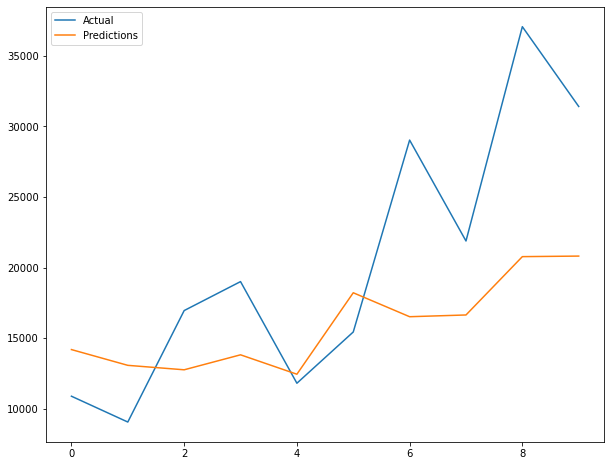

In [73]:
df_res['Actual'].plot(figsize=(10,8) , legend = True)
df_res['Predictions'].plot(legend = True)

In [74]:
forecasted = best_arma_fit1.forecast(48)

In [75]:
forecasted

2017-03-31    14632.226322
2017-04-30     3522.577704
2017-05-31    10788.968109
2017-06-30    11601.681856
2017-07-31     5701.084320
2017-08-31    13093.624346
2017-09-30    14274.128443
2017-10-31    15937.700400
2017-11-30    27816.372146
2017-12-31    23315.146549
2018-01-31    13905.568414
2018-02-28    13739.174313
2018-03-31    11028.656497
2018-04-30    11070.862124
2018-05-31    14632.626868
2018-06-30    10897.157897
2018-07-31     8969.655544
2018-08-31    10336.430344
2018-09-30    10929.687625
2018-10-31    16717.278838
2018-11-30    21860.972251
2018-12-31    19248.264602
2019-01-31    16045.623722
2019-02-28    13686.218452
2019-03-31    12339.011138
2019-04-30    14597.307263
2019-05-31    15400.746266
2019-06-30    12816.185804
2019-07-31    10783.022230
2019-08-31     9536.067746
2019-09-30    11013.808609
2019-10-31    15708.261257
2019-11-30    18397.587777
2019-12-31    17583.556830
2020-01-31    15432.943482
2020-02-29    13278.062723
2020-03-31    13512.913305
2

In [76]:
final_furni = pd.concat([train['Sales'] , forecasted], axis = 0)

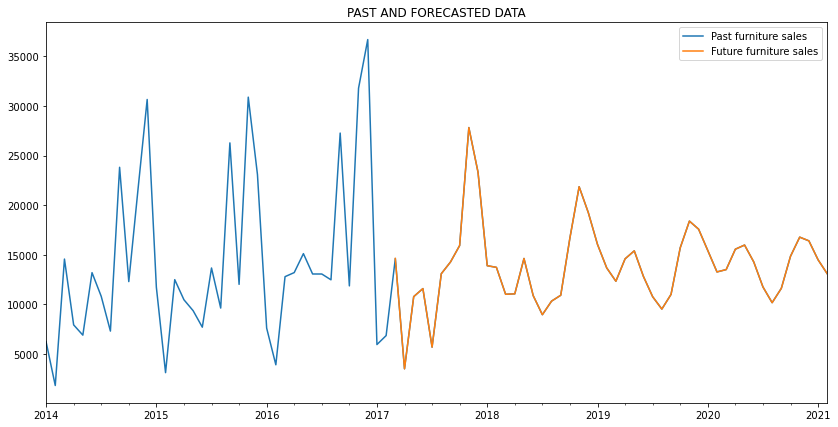

In [77]:
plt.figure(figsize=(14,7))
final_furni.plot(label='Past furniture sales')
forecasted.plot(label='Future furniture sales')
plt.title('PAST AND FORECASTED DATA')
plt.legend()

##### Here we can observe that our forecasted sales will be less than the past sales of furniture  and decreasing over the years

## FOR technology

In [197]:
checkstn(df_tech_month)

1.861596730206398e-06
Data is Stationary proceed to model building


## - Here it can be observed that

    - Original furniture sales data is stationary.
    
    - So we can go forward with ARMA model for future tech sales forecasting.


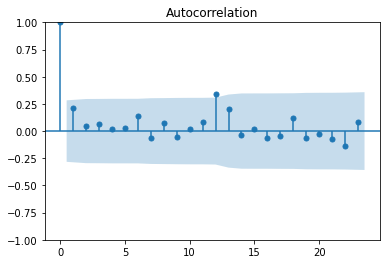

In [161]:
plot_acf(df_tech_month,lags=40);

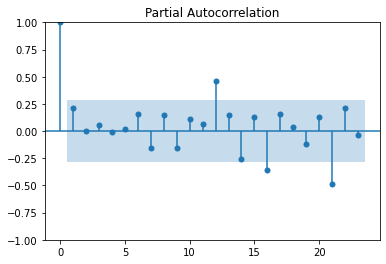

In [164]:
plot_pacf(df_tech_month,lags=23);

In [166]:
from statsmodels.tsa.arima.model import ARIMA
for p in range(1,4):
    for q in range(1,2):
        arma_mod = ARIMA(df_tech_month,order=(p,0,q))
        moddd = arma_mod.fit()
        print('aic score',(p,0,q),'=',moddd.aic)

aic score (1, 0, 1) = 1029.1161385812543
aic score (2, 0, 1) = 1030.6533083541303
aic score (3, 0, 1) = 1032.5474187660516


In [167]:
arma_mod = ARIMA(df_tech_month,order=(1,0,1))
moddd = arma_mod.fit()

In [171]:
df_tech_month.head()

,Sales
Order Date,
2014-01-31,3143.290
2014-02-28,1608.510
2014-03-31,32511.174
2014-04-30,9195.434
2014-05-31,9599.876


In [169]:
moddd.predict()

Order Date
2014-01-31    17419.879438
2014-02-28    14668.760483
2014-03-31    12681.317301
2014-04-30    15825.577584
2014-05-31    15025.921665
2014-06-30    14473.479242
2014-07-31    13906.205325
2014-08-31    13407.600078
2014-09-30    13146.010368
2014-10-31    15340.261822
2014-11-30    15074.221666
2014-12-31    16877.186743
2015-01-31    17349.140244
2015-02-28    15956.731275
2015-03-31    14667.570310
2015-04-30    14345.408515
2015-05-31    14165.734338
2015-06-30    14068.316303
2015-07-31    13419.616682
2015-08-31    13305.937456
2015-09-30    13772.028573
2015-10-31    14542.048365
2015-11-30    14281.513617
2015-12-31    15496.623475
2016-01-31    17792.584503
2016-02-29    16447.784161
2016-03-31    16045.077872
2016-04-30    16720.995479
2016-05-31    16559.985127
2016-06-30    17942.156005
2016-07-31    17742.839426
2016-08-31    17238.477530
2016-09-30    16425.224879
2016-10-31    17182.130683
2016-11-30    18756.447099
2016-12-31    19595.698041
2017-01-31    197

In [172]:
pvalue = sm.stats.acorr_ljungbox(moddd.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0 . Bad Model')
    
else:
    print('Model is good Accept H0')

[0.67362306]
Model is good Accept H0


In [173]:
ww = int(len(df_tech_month)*0.8)
train__ = df_tech_month.iloc[:ww]
test__ = df_tech_month.iloc[ww:]

In [174]:
predictf = moddd.predict(0,len(test__)-1)
print(predictf)

Order Date
2014-01-31    17419.879438
2014-02-28    14668.760483
2014-03-31    12681.317301
2014-04-30    15825.577584
2014-05-31    15025.921665
2014-06-30    14473.479242
2014-07-31    13906.205325
2014-08-31    13407.600078
2014-09-30    13146.010368
2014-10-31    15340.261822
Freq: M, Name: predicted_mean, dtype: float64


In [228]:
actual = []
predd = []
for i in range(len(predictf)):
    actual.append(test__['Sales'][i])
    predd.append(predictf[i])
    
df_res = pd.DataFrame({'Actual':actual,'predicted':predd})
df_res['error'] = df_res.Actual - df_res.predicted
df_res

,Actual,predicted,error
0,33428.622,17419.879438,16008.742562
1,12383.387,14668.760483,-2285.373483
2,13566.588,12681.317301,885.270699
3,17061.100,15825.577584,1235.522416
4,23209.926,15025.921665,8184.004335
5,17619.162,14473.479242,3145.682758
6,26942.603,13906.205325,13036.397675
7,32855.663,13407.600078,19448.062922
8,49918.773,13146.010368,36772.762632
9,21984.910,15340.261822,6644.648178


In [230]:
print("mean squared error = ",mean_squared_error(df_res.Actual,df_res.predicted))
print("root mean squared error = ",mean_squared_error(df_res.Actual,df_res.predicted, squared=False))

mean squared error =  228524847.39584112
root mean squared error =  15117.038314294276


<AxesSubplot:>

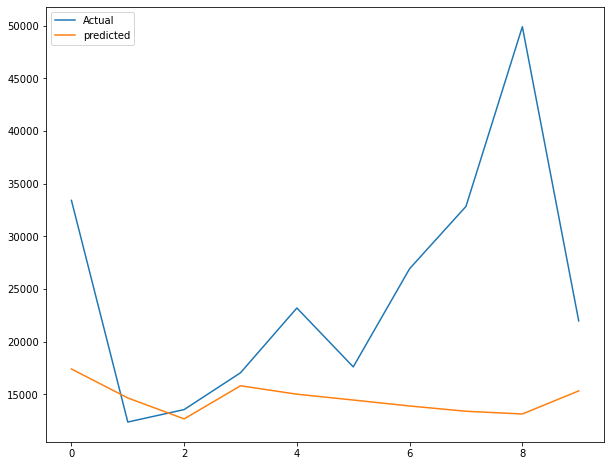

In [181]:
df_res['Actual'].plot(figsize=(10,8) , legend = True)
df_res['predicted'].plot(legend = True)

In [182]:
fore = moddd.forecast(40)

In [183]:
bhs = pd.concat([df_tech_month,fore],axis=0)

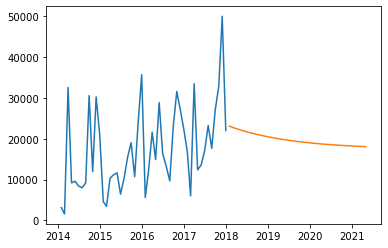

In [185]:
plt.plot(df_tech_month)
plt.plot(fore)


### WE ARE NOT GETTING PROPER FORECAST WITH OUR ARMA MODEL

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing

In [80]:
model_tech_exp = ExponentialSmoothing(df_tech_month,trend='add',seasonal='add',seasonal_periods = 12).fit()
print(model_tech_exp)

In [81]:
model_tech_exp_vals = model_tech_exp.fittedvalues

In [82]:
checkstn(model_tech_exp_vals)

0.9852373582089294
Data is not Stationary


In [91]:
diff = model_tech_exp_vals - model_tech_exp_vals.shift()

In [92]:
diff.dropna(inplace=True)

In [93]:
checkstn(diff)

1.5818270748200662e-16
Data is Stationary proceed to model building


### d = 1

## - Here it can be observed that

    - Exponentially smoothened sales data is not stationary.
    
    - So we can go forward with ARIMA&SARIMA model for future tech sales forecasting.


## Technology sales forecasting using ARMA model

#### ACF PACF PLOT to determine p and q values (here d = 0 for ARMA model)

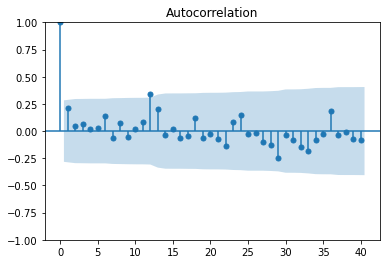

In [198]:
plot_acf(df_tech_month,lags=40);

### q = 1 from ACF

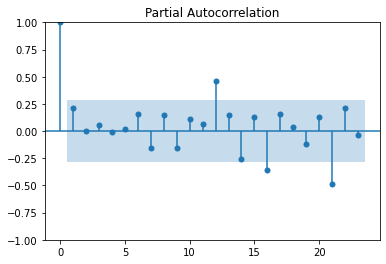

In [199]:
plot_pacf(df_tech_month,lags=23);

### p = 3 from PACF

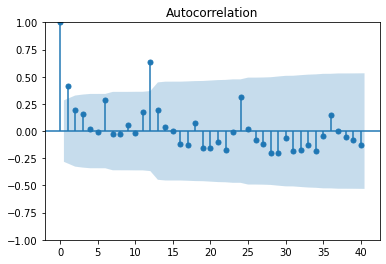

In [84]:
plot_acf(model_tech_exp_vals,lags=40);

### q = 2

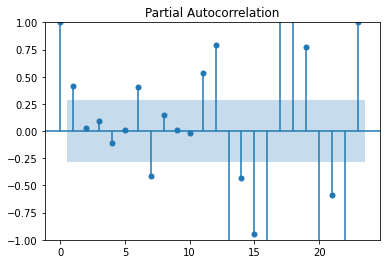

In [86]:
plot_pacf(model_tech_exp_vals,lags=23);

## Checking different values of P and Q and AIC scores to determine the best values

In [200]:
rez3 = []
q_val = [1]
for p in range(1,4):
    for q in q_val :
        arma_trial3 = ARIMA(df_tech_month,order=(p,0,q))
        vals3 = arma_trial3.fit()
        
        print('AIC value for different trial models',(p,0,q),'= ',vals3.aic)
        rez3.append(vals3.aic)
        
print('Best values for our ARMA model is:- ',np.min(rez3))

AIC value for different trial models (1, 0, 1) =  1029.1161385812543
AIC value for different trial models (2, 0, 1) =  1030.6533083541303
AIC value for different trial models (3, 0, 1) =  1032.5474187660516
Best values for our ARMA model is:-  1029.1161385812543


### From above execution we can observe that for p,q values of 1,1 we are getting the least AIC value

In [88]:
ss = int(len(model_tech_exp_vals)*0.8)
train1 = model_tech_exp_vals.iloc[:ss]
test1= model_tech_exp_vals.iloc[ss:]

In [90]:
rez3 = []
q_val = [1,2]
for p in range(1,14):
    for q in q_val :
        arma_trial3 = ARIMA(train1,order=(p,0,q))
        vals3 = arma_trial3.fit()
        
        print('AIC value for different trial models',(p,1,q),'= ',vals3.aic)
        rez3.append(vals3.aic)
        
print('Best values for our ARIMA model is:- ',np.min(rez3))

AIC value for different trial models (1, 1, 1) =  789.1239424982881
AIC value for different trial models (1, 1, 2) =  791.2533341903156
AIC value for different trial models (2, 1, 1) =  789.9023684711038
AIC value for different trial models (2, 1, 2) =  788.052576508304
AIC value for different trial models (3, 1, 1) =  793.1168048720227
AIC value for different trial models (3, 1, 2) =  791.8279214839301
AIC value for different trial models (4, 1, 1) =  793.689636971252
AIC value for different trial models (4, 1, 2) =  787.4459282976636
AIC value for different trial models (5, 1, 1) =  787.6406427991566
AIC value for different trial models (5, 1, 2) =  783.7552041777517
AIC value for different trial models (6, 1, 1) =  785.3472037440018
AIC value for different trial models (6, 1, 2) =  784.362122043757
AIC value for different trial models (7, 1, 1) =  785.386220685481
AIC value for different trial models (7, 1, 2) =  787.0666559916666
AIC value for different trial models (8, 1, 1) =  78

### Best ARMA model

In [233]:
best_arma3 = ARIMA(df_tech_month,order=(1,0,50))
best_arma_fit3 = best_arma3.fit()
print(best_arma_fit3.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                ARIMA(1, 0, 50)   Log Likelihood                -493.673
Date:                Tue, 31 Jan 2023   AIC                           1093.346
Time:                        17:11:37   BIC                           1192.520
Sample:                    01-31-2014   HQIC                          1130.824
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.742e+04   1.22e+04      1.427      0.154   -6506.977    4.13e+04
ar.L1          0.5960    598.384      0.001      0.999   -1172.215    1173.407
ma.L1         -0.3110    362.365     -0.001      0.9

In [96]:
best_arma6 = ARIMA(train1,order=(1,0,1))
best_arma_fit6 = best_arma6.fit()
print(best_arma_fit6.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -390.562
Date:                Tue, 31 Jan 2023   AIC                            789.124
Time:                        18:50:41   BIC                            795.674
Sample:                    01-31-2014   HQIC                           791.455
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.447e+04   1655.033      8.740      0.000    1.12e+04    1.77e+04
ar.L1          0.2050      0.471      0.435      0.664      -0.719       1.129
ma.L1          0.1138      0.526      0.216      0.8

In [122]:
from statsmodels.tsa.api import SARIMAX

In [124]:
for P in range(0,3):
    for Q in range(0,3):
        model_trial = SARIMAX(df_tech_month,order=(1,1,1), seasonal_order=(P,1,Q,12))
        sarima_model_1 = model_trial.fit()
        print('P = ',P ,'and D = ',1, 'and Q = ',Q)
        print(sarima_model_1.aic)

P =  0 and D =  1 and Q =  0
755.4758977089456
P =  0 and D =  1 and Q =  1
744.4031256072959
P =  0 and D =  1 and Q =  2
745.8385559423136
P =  1 and D =  1 and Q =  0
747.6032400141653
P =  1 and D =  1 and Q =  1
746.0077025062918
P =  1 and D =  1 and Q =  2
747.7347198352543
P =  2 and D =  1 and Q =  0
745.1129585341926
P =  2 and D =  1 and Q =  1
747.1114696172995
P =  2 and D =  1 and Q =  2
749.0626954841165


In [125]:
final_sari = sm.tsa.statespace.SARIMAX(train1,order=(1,1,1),seasonal_order=(0,1,1,12)).fit()
print(final_sari.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -212.430
Date:                            Tue, 31 Jan 2023   AIC                            432.861
Time:                                    19:04:20   BIC                            437.736
Sample:                                01-31-2014   HQIC                           434.213
                                     - 02-28-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1010      5.906      0.017      0.986     -11.475      11.677
ma.L1         -0.1189      5.840   

In [126]:
pvalue = sm.stats.acorr_ljungbox(final_sari.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0 . Bad Model')
    
else:
    print('Model is good Accept H0')

[0.08461798]
Model is good Accept H0


In [127]:
start = len(train1)
end = len(train1)+len(test1)-1

prediction_sari = final_sari.predict(start,end)
prediction_sari

2017-03-31    26329.370596
2017-04-30    17480.757224
2017-05-31    22793.244612
2017-06-30    19523.749487
2017-07-31    20045.706245
2017-08-31    21123.250449
2017-09-30    33585.305894
2017-10-31    27303.464138
2017-11-30    37815.161204
2017-12-31    36799.697300
Freq: M, Name: predicted_mean, dtype: float64

In [204]:
actual = []
predict = []

for i in range(len(prediction_sari)):
  actual.append(test1[i])
  predict.append(prediction_sari[i])
  df_res = pd.DataFrame({"ACTUAL":actual,"PREDICTION":predict})
  df_res["error"] = df_res["ACTUAL"] - df_res["PREDICTION"]

df_res

,ACTUAL,PREDICTION,error
0,25075.733907,26329.370596,-1253.636689
1,17200.790683,17480.757224,-279.966541
2,21651.053668,22793.244612,-1142.190944
3,15986.548492,19523.749487,-3537.200995
4,16100.544475,20045.706245,-3945.161770
5,17909.413973,21123.250449,-3213.836477
6,30825.031964,33585.305894,-2760.273930
7,24546.439045,27303.464138,-2757.025093
8,34782.699041,37815.161204,-3032.462164
9,36085.840929,36799.697300,-713.856371


In [205]:
print("mean squared error = ",mean_squared_error(df_res.ACTUAL,df_res.PREDICTION))

print("root mean squared error = ",mean_squared_error(df_res.ACTUAL,df_res.PREDICTION, squared=False))

mean squared error =  6628514.075789444
root mean squared error =  2574.5900791756044


In [ ]:
mean squared error =  6628514.075789444
root mean squared error =  2574.5900791756044

In [ ]:
mean squared error =  64065973.6193939
root mean squared error =  8004.122289132888

In [ ]:
mean squared error =  246335289.67777792
root mean squared error =  15695.072146306875

In [129]:
forecast1 = final_sari.predict(start= len(df_tech_month), end= (len(df_tech_month)+24),dynamic=True)

In [130]:
forecast1

2018-01-31    18664.363201
2018-02-28    17449.701823
2018-03-31    32941.541894
2018-04-30    24092.962089
2018-05-31    29405.452868
2018-06-30    26135.958087
2018-07-31    26657.914879
2018-08-31    27735.459087
2018-09-30    40197.514532
2018-10-31    33915.672776
2018-11-30    44427.369842
2018-12-31    43411.905938
2019-01-31    25276.571839
2019-02-28    24061.910461
2019-03-31    39553.750531
2019-04-30    30705.170727
2019-05-31    36017.661506
2019-06-30    32748.166724
2019-07-31    33270.123516
2019-08-31    34347.667724
2019-09-30    46809.723169
2019-10-31    40527.881414
2019-11-30    51039.578480
2019-12-31    50024.114575
2020-01-31    31888.780477
Freq: M, Name: predicted_mean, dtype: float64

In [131]:
df_tech_month.tail()

,Sales
Order Date,
2017-08-31,17619.162
2017-09-30,26942.603
2017-10-31,32855.663
2017-11-30,49918.773
2017-12-31,21984.910


In [132]:
dv =  df_tech_month['Sales']

In [133]:
plot = dv.append(forecast1)

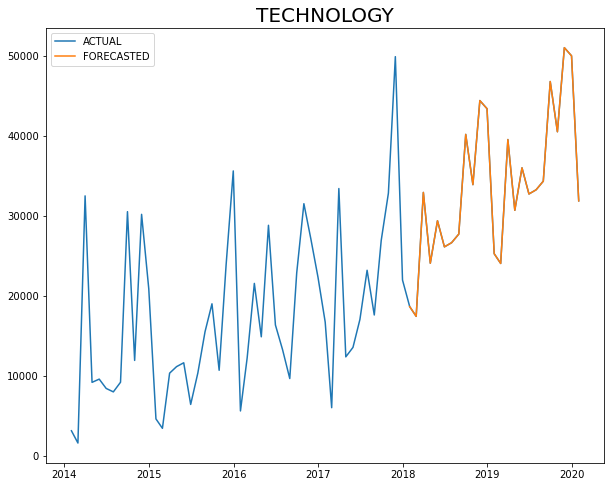

In [134]:
plt.figure(figsize=(10,8))
plt.plot(plot,label="ACTUAL")
plt.plot(forecast1,label="FORECASTED")
plt.legend()
plt.title("TECHNOLOGY",fontsize=20)
plt.show()

### TECHNOLOGY SALES ARE GOING UP OVER THE YEARS AS PER SARIMAX MODEL

## FOLLOWING WAS DONE USING ARMA - DON'T RUN THIS CODE

### Splitting into training and testing

In [235]:
df_tech_month.shape

(48, 1)

In [236]:
train = df_tech_month.iloc[:35]
test = df_tech_month.iloc[35:]
print("train={},test={}".format(len(train),len(test)))

train=35,test=13


In [237]:
predictions3 = best_arma_fit3.predict(0,len(test)-1)
print(predictions3)

Order Date
2014-01-31    17419.876540
2014-02-28    14937.992114
2014-03-31    15380.558508
2014-04-30    20790.562461
2014-05-31    13704.039271
2014-06-30    16093.990800
2014-07-31    15581.435001
2014-08-31    14169.830791
2014-09-30    20426.999830
2014-10-31    15330.764943
2014-11-30    16398.856496
2014-12-31    17884.502526
2015-01-31    13166.958705
Freq: M, Name: predicted_mean, dtype: float64


In [238]:
print(predictions3)

Order Date
2014-01-31    17419.876540
2014-02-28    14937.992114
2014-03-31    15380.558508
2014-04-30    20790.562461
2014-05-31    13704.039271
2014-06-30    16093.990800
2014-07-31    15581.435001
2014-08-31    14169.830791
2014-09-30    20426.999830
2014-10-31    15330.764943
2014-11-30    16398.856496
2014-12-31    17884.502526
2015-01-31    13166.958705
Freq: M, Name: predicted_mean, dtype: float64


In [239]:
actual = [] 
pred = []

for i in range(len(predictions)):
    actual.append(test['Sales'][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'Actual' : actual , 'Predictions' : pred})
df_res['error'] = df_res['Actual'] - df_res['Predictions']

df_res

,Actual,Predictions,error
0,22322.762,13998.114807,8324.647193
1,16733.053,12758.451208,3974.601792
2,6027.024,12067.303878,-6040.279878
3,33428.622,13269.678661,20158.943339
4,12383.387,12825.009414,-441.622414
5,13566.588,18493.641909,-4927.053909
6,17061.100,16213.292709,847.807291
7,23209.926,16645.798393,6564.127607
8,17619.162,21357.681857,-3738.519857
9,26942.603,17400.917052,9541.685948


In [246]:
print("mean squared error = ",mean_squared_error(df_res.Actual,df_res.Predictions))
print("root mean squared error = ",mean_squared_error(df_res.Actual,df_res.Predictions, squared=False))

mean squared error =  250463079.66985223
root mean squared error =  15826.02539078755


<AxesSubplot:>

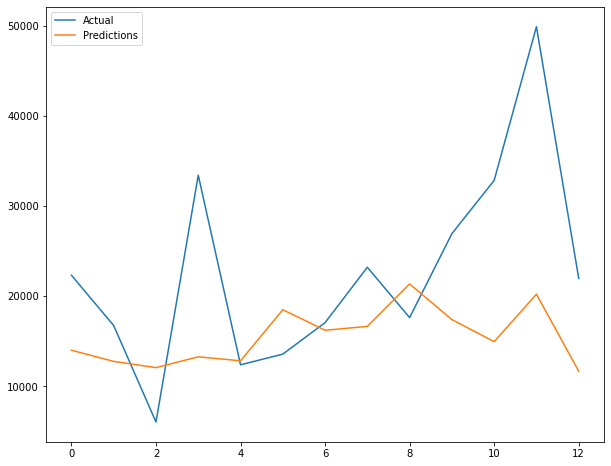

In [240]:
df_res['Actual'].plot(figsize=(10,8) , legend = True)
df_res['Predictions'].plot(legend = True)

In [241]:
forecasted = best_arma_fit3.forecast(48)

In [242]:
final_tech = pd.concat([train['Sales'] , forecasted], axis = 0)

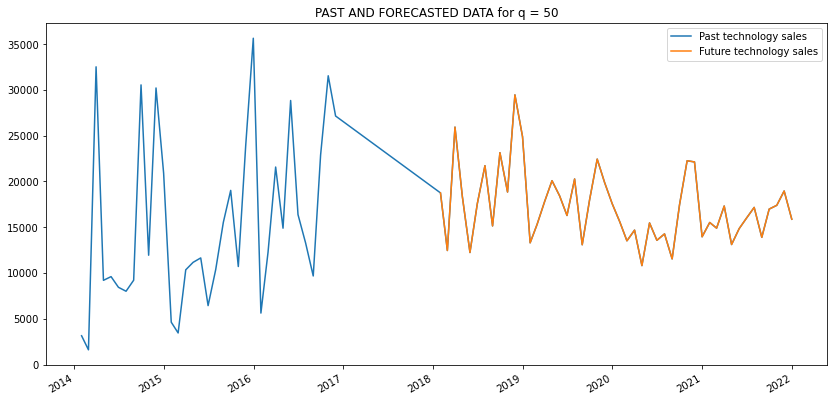

In [243]:
plt.figure(figsize=(14,7))
final_tech.plot(label='Past technology sales')
forecasted.plot(label='Future technology sales')
plt.title('PAST AND FORECASTED DATA for q = 50')
plt.legend()

### Here it can be observed that Future Technology Sales are declining and staying constant for 4 years

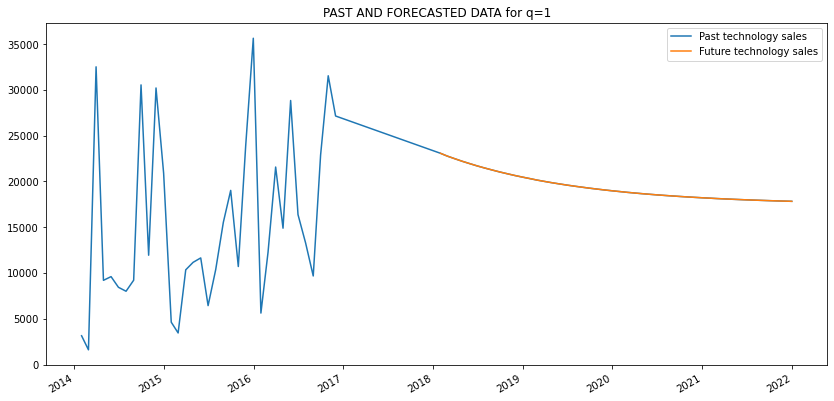

In [232]:
plt.figure(figsize=(14,7))
final_tech.plot(label='Past technology sales')
forecasted.plot(label='Future technology sales')
plt.title('PAST AND FORECASTED DATA for q = 1')
plt.legend()

### OFFICE SUPPLIES DATA

In [234]:
data = df_office_month['Sales']

In [235]:
checkstn(data)

0.32948727549472834
Data is not Stationary


In [236]:
diff_ = data - data.shift()

In [237]:
diff_.dropna(inplace=True)

In [238]:
checkstn(diff_)


0.0004287262459097761
Data is Stationary proceed to model building


### d = 1 since after one step of execution of differentiation we are getting stationary data we have out d = 1 value

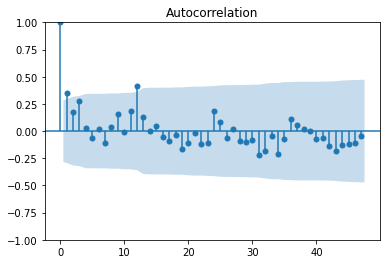

In [239]:
plot_acf(data,lags = 47);

## q = 2 

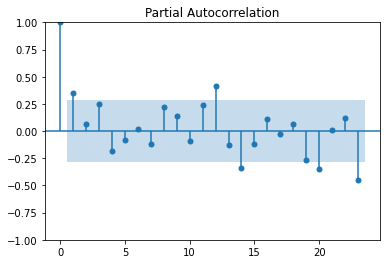

In [240]:
plot_pacf(data,lags = 23);

## p = 5

In [109]:
zz = []
for p in range(1,6):
    for q in range(1,3):
        arima_model = ARIMA(data,order=(p,1,q))
        arima_model_one = arima_model.fit()
        print('p = ',p ,'and d = ',1, 'and q = ',q)
        zz.append(arima_model_one.aic)
        print(arima_model_one.aic)
np.min(zz)                

p =  1 and d =  1 and q =  1
983.2136811668765
p =  1 and d =  1 and q =  2
984.1498720799857
p =  2 and d =  1 and q =  1
983.5684043858786
p =  2 and d =  1 and q =  2
985.3184599479988
p =  3 and d =  1 and q =  1
984.4831384939979
p =  3 and d =  1 and q =  2
985.935308603395
p =  4 and d =  1 and q =  1
985.7994993965799
p =  4 and d =  1 and q =  2
984.6828919435072
p =  5 and d =  1 and q =  1
987.6208329934343
p =  5 and d =  1 and q =  2
986.5217075445389


983.2136811668765

- p = 1 

- q = 1 

- d = 1 

- are the best non seasonal parameters for our ARIMA model

In [241]:
p = 1
q = 1
d = 1
final_model = ARIMA(data,order=(p,d,q))
final_arima = final_model.fit()
print(final_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -488.607
Date:                Tue, 31 Jan 2023   AIC                            983.214
Time:                        23:21:51   BIC                            988.764
Sample:                    01-31-2014   HQIC                           985.302
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1076      0.241      0.446      0.656      -0.365       0.580
ma.L1         -0.7615      0.132     -5.767      0.000      -1.020      -0.503
sigma2      7.146e+07   1.48e-10   4.84e+17      0.0

In [242]:
p_value = sm.stats.acorr_ljungbox(final_arima.resid,lags=[1],return_df=True)["lb_pvalue"].values
print("p value is :- ",p_value)

if p_value<0.05:
    print("reject the model reject null H0 hypothesis")
else:
    print("accept the model accept alternate hypothesis H0")

p value is :-  [0.70541401]
accept the model accept alternate hypothesis H0


In [243]:
train = df_office_month.iloc[:35]
test = df_office_month.iloc[35:]
print("train={},test={}".format(len(train),len(test)))

train=35,test=13


In [245]:
predictionscc = final_arima.predict(0,len(test)-1)

actual = [] 
pred = []

for i in range(len(predictionscc)):
    actual.append(test['Sales'][i])
    pred.append(predictionscc[i])

df_res = pd.DataFrame({'Actual' : actual , 'Predictions' : pred})
df_res['error'] = df_res['Actual'] - df_res['Predictions']

df_res

,Actual,Predictions,error
0,37997.566,0.000000,37997.566000
1,21274.289,2814.313873,18459.975127
2,7407.772,1791.948331,5615.823669
3,14550.286,4644.928858,9905.357142
4,15072.191,6692.678015,8379.512985
5,13736.964,6374.328811,7362.635189
6,16912.039,8641.282417,8270.756583
7,10241.468,10460.758384,-219.290384
8,30059.852,10280.593219,19779.258781
9,31895.843,16131.109776,15764.733224


In [117]:
forecast_arima = final_arima.forecast(11)
forecast_arima


2018-01-31    26381.559556
2018-02-28    25945.213232
2018-03-31    25898.263747
2018-04-30    25893.212131
2018-05-31    25892.668593
2018-06-30    25892.610110
2018-07-31    25892.603818
2018-08-31    25892.603141
2018-09-30    25892.603068
2018-10-31    25892.603060
2018-11-30    25892.603059
Freq: M, Name: predicted_mean, dtype: float64

In [121]:
train['Sales'].tail()

Order Date
2016-07-31    12924.444
2016-08-31     8959.740
2016-09-30    23263.738
2016-10-31    16281.794
2016-11-30    20487.278
Freq: M, Name: Sales, dtype: float64

In [118]:
final_sups = pd.concat([train['Sales'] , forecast_arima ], axis = 0)

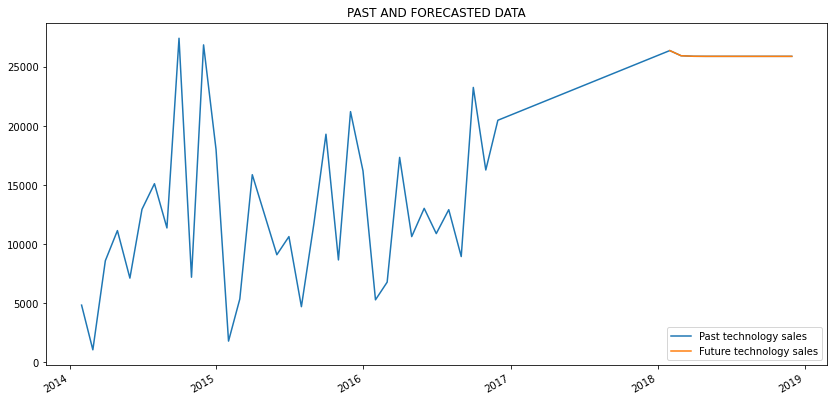

In [119]:
plt.figure(figsize=(14,7))
final_sups.plot(label='Past technology sales')
forecast_arima.plot(label='Future technology sales')
plt.title('PAST AND FORECASTED DATA')
plt.legend()

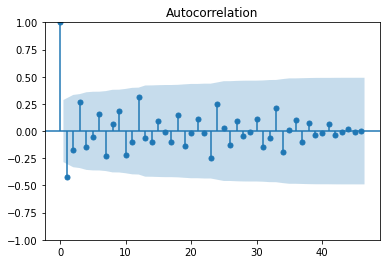

In [144]:
plot_acf(diff_,lags = 46);

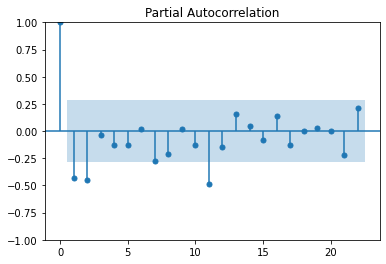

In [146]:
plot_pacf(diff_,lags = 22);

### SARIMA STARTS HERE

In [147]:
sarima_model = auto_arima(df_office_month,start_p=0,max_p=4,start_q=0,max_q=2,seasonal=True,m=12,trace=True,d=1,D=1)
print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=731.838, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=740.437, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=726.023, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=717.172, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=728.668, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=718.898, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=718.892, Time=0.53 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=718.780, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=725.260, Time=0.24 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=730.324, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=722.788, Time=0.08 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=718.277, Time=0.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=722.473, Time=0.21 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=723.414, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[12] intercep

In [148]:
p=0
q=1
d=1
P=0
Q=1
D=1
sarima_model_fin = sm.tsa.statespace.SARIMAX(df_office_month,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()

In [149]:
print(sarima_model_fin.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -355.586
Date:                            Tue, 31 Jan 2023   AIC                            717.172
Time:                                    19:26:51   BIC                            721.838
Sample:                                01-31-2014   HQIC                           718.783
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6782      0.117     -5.811      0.000      -0.907      -0.449
ma.S.L12      -0.6428      0.285   

In [152]:
forecast_fo_sarima = sarima_model_fin.forecast(36)
forecast_fo_sarima

2018-01-31    21851.397266
2018-02-28    17236.853770
2018-03-31    25110.888376
2018-04-30    23445.732891
2018-05-31    22483.134577
2018-06-30    24112.135776
2018-07-31    21443.901517
2018-08-31    28513.564423
2018-09-30    35897.541889
2018-10-31    26709.690144
2018-11-30    35311.129114
2018-12-31    37025.546179
2019-01-31    26902.853127
2019-02-28    22288.309630
2019-03-31    30162.344236
2019-04-30    28497.188751
2019-05-31    27534.590437
2019-06-30    29163.591636
2019-07-31    26495.357377
2019-08-31    33565.020283
2019-09-30    40948.997749
2019-10-31    31761.146004
2019-11-30    40362.584975
2019-12-31    42077.002039
2020-01-31    31954.308987
2020-02-29    27339.765490
2020-03-31    35213.800096
2020-04-30    33548.644611
2020-05-31    32586.046297
2020-06-30    34215.047496
2020-07-31    31546.813237
2020-08-31    38616.476143
2020-09-30    46000.453609
2020-10-31    36812.601864
2020-11-30    45414.040835
2020-12-31    47128.457899
Freq: M, Name: predicted_mea

In [153]:
sarima_bas = pd.concat([df_office_month['Sales'] , forecast_fo_sarima[0:1]] , axis = 0)

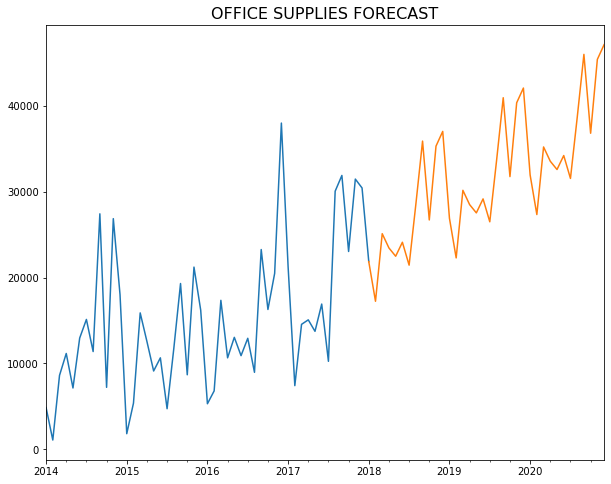

In [154]:
plt.figure(figsize=(10,8))
sarima_bas.plot()
forecast_fo_sarima.plot()
plt.title("OFFICE SUPPLIES FORECAST",fontsize='16');

#### As observed in the above plot office supply sales are going up- increasing over the years

In [186]:
qq = int(len(df_office_month)*0.8)
train_sarima = df_office_month.iloc[:qq]
test_sarima = df_office_month.iloc[qq:]

In [187]:
pred_sarima = sarima_model_fin.predict(0,len(test_sarima)-1)

In [189]:
actual_sarima = []
predsarima = []
for z in range(len(pred_sarima)):
    actual_sarima.append(test_sarima['Sales'][z])
    predsarima.append(pred_sarima[z])
df_res_sar = pd.DataFrame({'Actual':actual_sarima,'Predicted':predsarima})
df_res_sar['error'] = df_res_sar.Actual - df_res_sar.Predicted
df_res_sar

,Actual,Predicted,error
0,14550.286,0.000000,14550.286000
1,15072.191,2655.425246,12416.765754
2,13736.964,1987.991388,11748.972612
3,16912.039,4476.094542,12435.944458
4,10241.468,6865.440947,3376.027053
5,30059.852,6960.041330,23099.810670
6,31895.843,9039.046804,22856.796196
7,23037.192,11140.591085,11896.600915
8,31472.337,11222.985853,20249.351147
9,30436.942,16806.914448,13630.027552


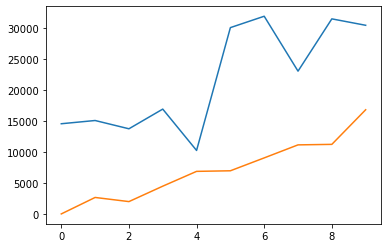

In [192]:
plt.plot(df_res_sar.Actual)
plt.plot(df_res_sar.Predicted)

In [193]:
print("mean squared error = ",mean_squared_error(df_res_sar.Actual,df_res_sar.Predicted))
print("root mean squared error = ",mean_squared_error(df_res_sar.Actual,df_res_sar.Predicted, squared=False))

mean squared error =  246335289.67777792
root mean squared error =  15695.072146306875


In [249]:
furni = pd.DataFrame({'Category = Furniture':['ARMA-MODEL'],'RMSE':[64065973.6193939],'MSE':[8004.122289132888]})

In [250]:
techno = pd.DataFrame({'Category = Technology':['ARMA-MODEL','ARIMA-MODEL','SARIMA-MODEL'],
              'RMSE':[15117.038314294276,'not-evaluated',2574.5900791756044],'MSE':[228524847.39584112,'not-evaluated',6628514.075789444]})

In [251]:
office = pd.DataFrame({'Category = Office':['ARMA-MODEL','ARIMA-MODEL','SARIMA-MODEL'],
              'RMSE':['not-evaluated',15826.02539078755,15695.072146306875],'MSE':['not-evaluated',250463079.66985223,246335289.67777792]})

In [253]:
furni 

,Category = Furniture,RMSE,MSE
0,ARMA-MODEL,6.406597e+07,8004.122289


In [254]:
techno 

,Category = Technology,RMSE,MSE
0,ARMA-MODEL,15117.038314,228524847.395841
1,ARIMA-MODEL,not-evaluated,not-evaluated
2,SARIMA-MODEL,2574.590079,6628514.075789


In [255]:
office

,Category = Office,RMSE,MSE
0,ARMA-MODEL,not-evaluated,not-evaluated
1,ARIMA-MODEL,15826.025391,250463079.669852
2,SARIMA-MODEL,15695.072146,246335289.677778


### Key insights and observations

- For furniture sales forecasting we have made use of ARMA model because the data was stationary for furniture sales


- For technology sales forecasting we have made use of SARIMA model because the data was not stationary for technology sales and seasonality was present in the original technology sales data


- For furniture sale forecasting we have made use of ARIMA and SARIMA model because the data was not stationary for office supplies sales and seasonality was present in the original office supplies data


### SARIMAX model is the best model for forecasting future sales as seasonality is present in our technology and office sales data